## Demonstration of rotations using Euler angles in orix

interactive(children=(IntSlider(value=0, description='psi1', max=359), IntSlider(value=0, description='phi', m…

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
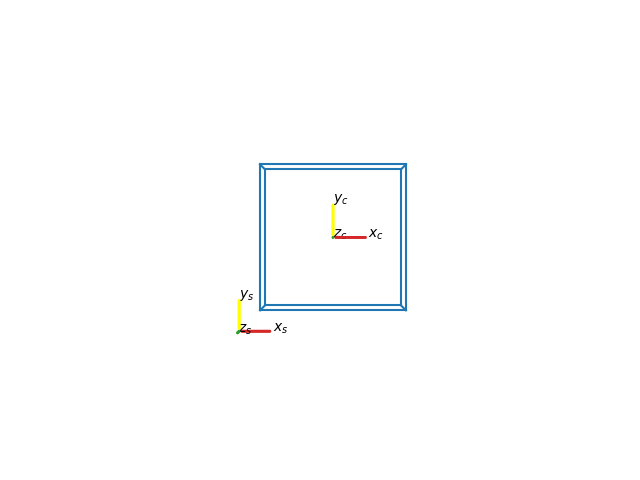

In [1]:
%matplotlib widget
from ipywidgets import IntSlider, interactive
import numpy as np
from orix.vector import Vector3d
from orix.quaternion import Orientation
from orix.plot.unit_cell_plot import _calculate_basic_unit_cell_vertices, _calculate_basic_unit_cell_edges

# define an initial Orientation
ori0 = Orientation.from_euler((0, 0, 0), direction='lab2crystal')

# initial plot
axes_length = 0.5
fig = ori0.plot_unit_cell(return_figure=True, axes_length=axes_length)
assert len(fig.axes) == 1
axes = fig.axes[0]

# define an initial unit cell (cubic)
a1, a2, a3 = 2, 2, 2
verts = _calculate_basic_unit_cell_vertices(a1, a2, a3)
edges = _calculate_basic_unit_cell_edges(verts, a1, a2, a3)
edges = Vector3d(edges)

# get plot features
lattice = {a.get_label(): a for a in axes.lines}
ref_axes = {a.get_label(): a for a in axes.patches}
ref_axes_text = {a.get_label(): a for a in axes.texts}
ref_axes_labels = ('x', 'y', 'z')

# change this flag to put crystal references axes at sample reference frame origin
crystal_reference_axes_at_sample_reference_origin = True
# define what happens on rotation
def update(psi1, phi, psi2):
    rot = Orientation.from_euler(np.deg2rad((psi1, phi, psi2)), direction='lab2crystal')
    edges_rot = rot * edges

    for i, (v1, v2) in enumerate(edges_rot.data):
        lattice[f'Lattice edge {i}'].set_data_3d(*zip(v1, v2))

    for i, v in enumerate(Vector3d(np.eye(3))):
        v1 = (rot * v).data.ravel() * axes_length
        v0r = rot * Vector3d(verts[0])  # offset axes to sit on crystal origin
        _data = np.zeros((3, 2))
        if not crystal_reference_axes_at_sample_reference_origin:
            _data = (_data.T + v0r.data).T
        _data[:, 1] += v1
        ref_axes[f"Crystal reference axes {ref_axes_labels[i]}"]._verts3d = tuple(_data)
        ref_axes_text[f"Crystal reference axes label {ref_axes_labels[i]}"].set_position_3d(_data[:,1])

# run interactive function
interactive(update, psi1=IntSlider(0,0, 359), phi=IntSlider(0,0, 359), psi2=IntSlider(0,0, 359))